# Bag of Words Meets Bags of Popcorn

[Kaggle Chanllenge](https://www.kaggle.com/c/word2vec-nlp-tutorial)
Use Google's Word2Vec for movie reviews

Deadline: 2019/01/05

In [3]:
from time import time
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression

## Import Cleaned Data

In [5]:
train = pd.read_csv( "Data/Word2Vec_clean_labeledTrainData.csv", index_col=0 )

unlabeled_train = pd.read_csv( "Data/Word2Vec_clean_unlabeledTrainData.csv", index_col=0 )

test = pd.read_csv( "Data/Word2Vec_clean_testData.csv", index_col=0 )

In [6]:
train.head()

,review,id,score,sentiment
0,with all this stuff going down at the moment w...,"""5814_8""",8,1
1,the classic war of the worlds by timothy hines...,"""2381_9""",9,1
2,the film starts with a manager nicholas bell g...,"""7759_3""",3,0
3,it must be assumed that those who praised this...,"""3630_4""",4,0
4,superbly trashy and wondrously unpretentious s...,"""9495_8""",8,1


In [7]:
def train_test_and_evaluate(pipeline, x_train, y_train, x_test, y_test):
    if len(x_test[y_test == 0]) / (len(x_test)*1.) > 0.5:
        null_accuracy = len(x_test[y_test == 0]) / (len(x_test)*1.)
    else:
        null_accuracy = 1. - (len(x_test[y_test == 0]) / (len(x_test)*1.))
        
    t0 = time()
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    train_test_time = time() - t0
    
    accuracy = accuracy_score(y_test, y_pred)
    conmat = np.array(confusion_matrix(y_test, y_pred, labels=[0,1]))
    confusion = pd.DataFrame(conmat, index=['negative', 'positive'],
                             columns=['predicted_negative','predicted_positive'])
    
    print("null accuracy: {0:.2f}%".format(null_accuracy*100))
    print("accuracy score: {0:.2f}%".format(accuracy*100))
    if accuracy > null_accuracy:
        print("model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100))
    elif accuracy == null_accuracy:
        print("model has the same accuracy with the null accuracy")
    else:
        print("model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100))
    print("train and test time: {0:.2f}s".format(train_test_time))
    print("-"*80)
    
#     print("Confusion Matrix\n")
#     print(confusion)
    
#     print("-"*80)
#     print("Classification Report\n")
#     print(classification_report(y_test, y_pred, target_names=['negative','positive']))
    return accuracy, train_test_time

In [8]:
count_vectorizer = CountVectorizer()
lr = LogisticRegression()
n_features = np.arange(1000,5001,500) # from a to b with 間距 = c

def nfeature_accuracy_checker(vectorizer=count_vectorizer, n_features=n_features, 
                              stop_words=None, ngram_range=(1, 1), classifier=lr):
    result = []
    print (classifier)
    print ("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print("Validation result for {} features".format(n))
        nfeature_accuracy,tt_time = train_test_and_evaluate(checker_pipeline, x_train, y_train, x_validation, y_validation)
        result.append((n,nfeature_accuracy,tt_time))
    return result

### Bag of Words with Bigram and Trigram

According to Wikipedia, "**n-gram** is a continuous sequence of n items from a given sequence of text or speech".

In other words, n-grams are simply all combinations of adjacent words or letters of length n that you can find in your source text.

In [141]:
x = train.review
y = train.sentiment

In [142]:
x_train, x_rest, y_train, y_rest = train_test_split(x, y, test_size=.02, random_state=2000)
x_validation, x_test, y_validation, y_test = train_test_split(x_rest, y_rest, test_size=.5, random_state=2000)

In [143]:
print("Train set: {0} entries with {1:.2f}% negative, {2:.2f}% positive"
      .format(len(x_train), 
              (len(x_train[y_train == 0]) / (len(x_train)*1.))*100, 
              (len(x_train[y_train == 1]) / (len(x_train)*1.))*100))

print("Validation set: {0} entries with {1:.2f}% negative, {2:.2f}% positive"
      .format(len(x_validation),
              (len(x_validation[y_validation == 0]) / (len(x_validation)*1.))*100,
              (len(x_validation[y_validation == 1]) / (len(x_validation)*1.))*100))

print("Test set has: {0} entries with {1:.2f}% negative, {2:.2f}% positive"
      .format(len(x_test),
              (len(x_test[y_test == 0]) / (len(x_test)*1.))*100,
              (len(x_test[y_test == 1]) / (len(x_test)*1.))*100))

Train set: 24500 entries with 50.03% negative, 49.97% positive
Validation set: 250 entries with 50.80% negative, 49.20% positive
Test set has: 250 entries with 46.40% negative, 53.60% positive


In [144]:
feature_result_ug = nfeature_accuracy_checker()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


Validation result for 1000 features


/Users/wulingying/.pyenv/versions/3.7.1/envs/nlp/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 50.80%
accuracy score: 85.20%
model is 34.40% more accurate than null accuracy
train and test time: 3.99s
--------------------------------------------------------------------------------
Validation result for 1500 features
null accuracy: 50.80%
accuracy score: 83.60%
model is 32.80% more accurate than null accuracy
train and test time: 4.38s
--------------------------------------------------------------------------------
Validation result for 2000 features
null accuracy: 50.80%
accuracy score: 84.40%
model is 33.60% more accurate than null accuracy
train and test time: 4.54s
--------------------------------------------------------------------------------
Validation result for 2500 features
null accuracy: 50.80%
accuracy score: 83.20%
model is 32.40% more accurate than null accuracy
train and test time: 4.16s
--------------------------------------------------------------------------------
Validation result for 3000 features
null accuracy: 50.80%
accuracy score: 86.80%
mod

In [145]:
feature_result_bg = nfeature_accuracy_checker(ngram_range=(1, 2))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


Validation result for 1000 features
null accuracy: 50.80%
accuracy score: 85.60%
model is 34.80% more accurate than null accuracy
train and test time: 17.18s
--------------------------------------------------------------------------------
Validation result for 1500 features
null accuracy: 50.80%
accuracy score: 85.20%
model is 34.40% more accurate than null accuracy
train and test time: 19.19s
--------------------------------------------------------------------------------
Validation result for 2000 features
null accuracy: 50.80%
accuracy score: 84.40%
model is 33.60% more accurate than null accuracy
train and test time: 18.11s
--------------------------------------------------------------------------------
Validation result

In [146]:
feature_result_tg = nfeature_accuracy_checker(ngram_range=(1, 3))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


Validation result for 1000 features
null accuracy: 50.80%
accuracy score: 85.60%
model is 34.80% more accurate than null accuracy
train and test time: 39.27s
--------------------------------------------------------------------------------
Validation result for 1500 features
null accuracy: 50.80%
accuracy score: 85.20%
model is 34.40% more accurate than null accuracy
train and test time: 37.75s
--------------------------------------------------------------------------------
Validation result for 2000 features
null accuracy: 50.80%
accuracy score: 84.00%
model is 33.20% more accurate than null accuracy
train and test time: 38.38s
--------------------------------------------------------------------------------
Validation result

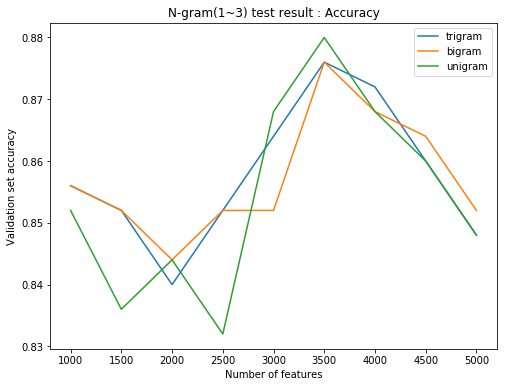

In [147]:
nfeatures_plot_tg = pd.DataFrame(feature_result_tg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bg = pd.DataFrame(feature_result_bg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ug = pd.DataFrame(feature_result_ug,columns=['nfeatures','validation_accuracy','train_test_time'])

plt.figure(figsize=(8,6))
plt.plot(nfeatures_plot_tg.nfeatures, nfeatures_plot_tg.validation_accuracy,label='trigram')
plt.plot(nfeatures_plot_bg.nfeatures, nfeatures_plot_bg.validation_accuracy,label='bigram')
plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='unigram')
plt.title("N-gram(1~3) test result : Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()

## TF-IDF: Term Frequency–Inverse Document Frequency
  
詞彙的重要程度：在文件中出現頻率高，而在整個文件集合的其他文件中出現頻率少

### ・fit( )
渡されたデータの最大値、最小値、平均、標準偏差、傾き...などの統計を取得して、内部メモリに保存する。

### ・transform( )
fit( )で取得した統計情報を使って、渡されたデータを実際に書き換える。

### 方法一：CountVectorizer + TfidfTransformer

In [6]:
vectorizer = CountVectorizer()
transformer = TfidfTransformer()

tfidf = transformer.fit_transform(vectorizer.fit_transform(train['text']))

In [ ]:
tfidf = tfidf.toarray()

# tfidf.shape = (25000, 74047)

In [ ]:
test_data_features = transformer.fit_transform(vectorizer.fit_transform(clean_train_reviews))
test_data_features = test_data_features.toarray()

### 方法二：直接用 TfidfVectorizer

In [ ]:
vectorizer_tfidf = TfidfVectorizer()
tfidf2 = vectorizer_tfidf.fit_transform(clean_train_reviews).toarray()

In [ ]:
tfidf2

## Random Forest (Supervised Learning)

More trees map perform better, but certainly take longer to run.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators = 100)
forest = forest.fit(tfidf, train['sentiment'])

In [ ]:
classifier = forest
result = forest.predict(test_data_features)

In [ ]:
# output = pd.DataFrame(data = {"id": test['id'], "sentiment": result})
# output.to_csv("Result/tfidf_and_count.csv", index=False, quoting=3)

In [ ]:
forest2 = forest.fit(tfidf2, train['sentiment'])

In [ ]:
classifier = forest2
result = forest2.predict(test_data_features)

In [ ]:
# output = pd.DataFrame(data = {"id": test['id'], "sentiment": result})
# output.to_csv("Result/tfidf2.csv", index=False, quoting=3)

### 方法三：TFIDF + SVM

In [79]:
vectorizer = CountVectorizer(analyzer = 'word', max_features = 3000)

train_data_features = vectorizer.fit_transform(train.review.tolist())
train_data_features = train_data_features.toarray()

test_data_features = vectorizer.fit_transform(test.review.tolist())
test_data_features = test_data_features.toarray()

In [80]:
tfidf_transformer = TfidfTransformer().fit(train_data_features)

train_tfidf = tfidf_transformer.transform(train_data_features)
test_tfidf = tfidf_transformer.transform(test_data_features)

In [81]:
from sklearn.svm import SVC, LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(train_tfidf, train['sentiment'])

result = linear_svc.predict(test_tfidf)

In [82]:
acc_linear_svc = round(linear_svc.score(train_tfidf, train['sentiment']) * 100, 2)

acc_linear_svc

92.28

In [83]:
output = pd.DataFrame(data = {"id": test['id'], "sentiment": result})
output.to_csv("TFIDF_SVM_feature3k.csv", index=False, quoting=3)

### Check Model Accuracy

In [132]:
csv = pd.read_csv("Results/Bag_of_Words_model_tutorial.csv")

In [133]:
def classified_correct(model, i, inside=False):
    if inside:
        true_positive = model["sentiment"][i] == 0 and int(model["id"][i].split('"')[1].split("_")[1]) <= 5
        true_negative = model["sentiment"][i] == 1 and int(model["id"][i].split('"')[1].split("_")[1]) > 5
    
    else:
        true_positive = model["sentiment"][i] == 0 and int(model["id"][i].split("_")[1]) <= 5
        true_negative = model["sentiment"][i] == 1 and int(model["id"][i].split("_")[1]) > 5
    
    return true_positive or true_negative

target = csv
correct = np.array([classified_correct(target, i) for i in range(target.shape[0])])
print(correct.sum() / target.shape[0])

0.84444
